1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


covariance matrix of the dataset:
[2.75535335e+01 5.39355633e-16 1.99010810e+00] [[-0.10863368 -0.81649658  0.56703797]
 [-0.58584316 -0.40824829 -0.70008651]
 [-0.80311052  0.40824829  0.43398942]]
using SVD:
[[-0.10863368  0.56703797 -0.81649658]
 [-0.58584316 -0.70008651 -0.40824829]
 [-0.80311052  0.43398942  0.40824829]] [2.75535335e+01 1.99010810e+00 7.88617179e-16]
[2.75535335e+01 1.99010810e+00 7.88617179e-16]
p = 1:  93.26383617675629 %
p = 2:  100.0 % - which is an expected value because the third component depends on the first two


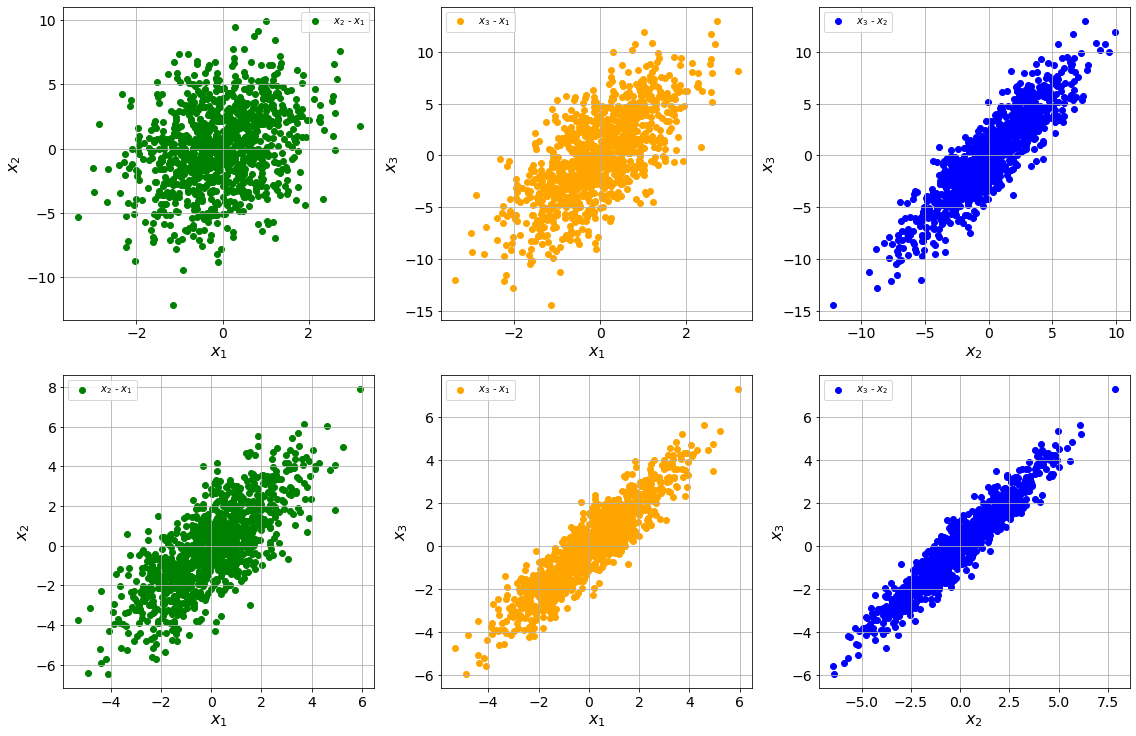

In [57]:
import numpy as np
from matplotlib import pyplot as plt

""" sort an array x in descending order and return the indices of the sorted array """
def sort_and_index_desc(x):
    return [i[0] for i in sorted(enumerate(x), key=lambda x:x[1], reverse=True)]

N = 1000
x_1 = np.random.normal(0, 1, N)
x_2 = x_1 + np.random.normal(0, 3, N)
x_3 = 2 * x_1 + x_2
dataset = np.array([x_1, x_2, x_3])
m = np.cov(dataset)
w, v = np.linalg.eig(m)
print('covariance matrix of the dataset:')
print(w, v)
U, s, Vh = np.linalg.svd(m)
print('using SVD:')
print(U, s)
mask = sort_and_index_desc(s)
s = s[mask]
U = U[mask]
# What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
# p = 1
print(s)
p = 1
print('p = 1: ', np.sum(s[:p])/np.sum(s) * 100, '%')
p = 2
print('p = 2: ', np.sum(s[:p])/np.sum(s) * 100, '% - which is an expected value because the third component depends on the first two')

# Redefine the data in the basis yielded by the PCA procedure

# Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.
%matplotlib inline
fig, ((o01, o02, o12), (n01, n02, n12)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
o01.scatter(x_1, x_2, label=r'$x_2$ - $x_1$', color='green')
o01.legend()
o01.grid()
o01.set_xlabel(r'$x_1$', fontsize=16)
o01.set_ylabel(r'$x_2$', fontsize=16)
o01.tick_params(labelsize=14)
o02.scatter(x_1, x_3, label=r'$x_3$ - $x_1$', color='orange')
o02.legend()
o02.grid()
o02.set_xlabel(r'$x_1$', fontsize=16)
o02.set_ylabel(r'$x_3$', fontsize=16)
o02.tick_params(labelsize=14)
o12.scatter(x_2, x_3, label=r'$x_3$ - $x_2$', color='blue')
o12.legend()
o12.grid()
o12.set_xlabel(r'$x_2$', fontsize=16)
o12.set_ylabel(r'$x_3$', fontsize=16)
o12.tick_params(labelsize=14)
fig.tight_layout()


# projection matrix W
W = U[:p]
W

# reduced dataset containing only the first two features
dataset_12 = np.array([x_1, x_2])

# reconstructing the third feature by using the projection matrix
dataset_reconstructed = np.dot(W.T, dataset_12)
xn_1 = dataset_reconstructed[2]
xn_2 = dataset_reconstructed[1]
xn_3 = dataset_reconstructed[0]

# plotting the dependences between reconstructed components
n01.scatter(xn_1, xn_2, label=r'$x_2$ - $x_1$', color='green')
n01.legend()
n01.grid()
n01.set_xlabel(r'$x_1$', fontsize=16)
n01.set_ylabel(r'$x_2$', fontsize=16)
n01.tick_params(labelsize=14)
n02.scatter(xn_1, xn_3, label=r'$x_3$ - $x_1$', color='orange')
n02.legend()
n02.grid()
n02.set_xlabel(r'$x_1$', fontsize=16)
n02.set_ylabel(r'$x_3$', fontsize=16)
n02.tick_params(labelsize=14)
n12.scatter(xn_2, xn_3, label=r'$x_3$ - $x_2$', color='blue')
n12.legend()
n12.grid()
n12.set_xlabel(r'$x_2$', fontsize=16)
n12.set_ylabel(r'$x_3$', fontsize=16)
n12.tick_params(labelsize=14)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

covariance matrix of the dataset:
[2.64128103e+01 1.09311856e-02 1.99254536e+00] [[-0.11902307 -0.81688348  0.56438895]
 [-0.57197366 -0.40822415 -0.71147676]
 [-0.81159081  0.40749776  0.41864774]]
using SVD:
[[-0.11902307  0.56438895 -0.81688348]
 [-0.57197366 -0.71147676 -0.40822415]
 [-0.81159081  0.41864774  0.40749776]] [2.64128103e+01 1.99254536e+00 1.09311856e-02]
[2.64128103e+01 1.99254536e+00 1.09311856e-02]
p = 1:  92.94954840012161 %
p = 2:  99.96153197064943 % - which is an expected value because the third component depends on the first two


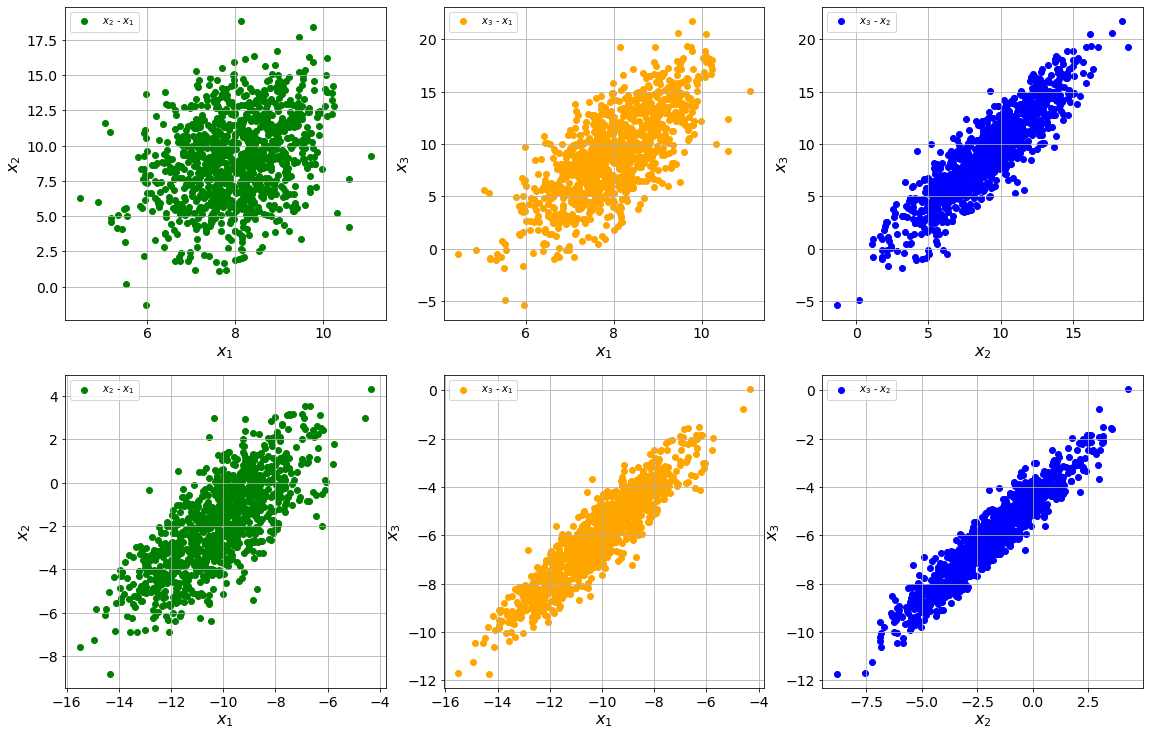

Results are similar - noise is not bringing any additional information to the dataset


In [73]:
x_1 = np.random.normal(0, 1, N)
x_2 = x_1 + np.random.normal(0, 3, N)
x_3 = 2 * x_1 + x_2

N_noise = 10
noise_variables = []

for noise_ in range(N_noise):
    noise_variables.append(np.random.normal(np.random.randint(5), np.random.randint(5)/50, N))
nv = noise_variables 

x_1 = x_1 + nv[0] + nv[1] + nv[2]
x_2 = x_2 + nv[3] + nv[4] + nv[5]
x_3 = x_3 + nv[6] + nv[7] + nv[8] + nv[9]


# now we repeat the procedure:
dataset = np.array([x_1, x_2, x_3])
m = np.cov(dataset)
w, v = np.linalg.eig(m)
print('covariance matrix of the dataset:')
print(w, v)
U, s, Vh = np.linalg.svd(m)
print('using SVD:')
print(U, s)
mask = sort_and_index_desc(s)
s = s[mask]
U = U[mask]
# What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
# p = 1
print(s)
p = 1
print('p = 1: ', np.sum(s[:p])/np.sum(s) * 100, '%')
p = 2
print('p = 2: ', np.sum(s[:p])/np.sum(s) * 100, '% - which is an expected value because the third component depends on the first two')

# Redefine the data in the basis yielded by the PCA procedure

# Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.
%matplotlib inline
fig, ((o01, o02, o12), (n01, n02, n12)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
o01.scatter(x_1, x_2, label=r'$x_2$ - $x_1$', color='green')
o01.legend()
o01.grid()
o01.set_xlabel(r'$x_1$', fontsize=16)
o01.set_ylabel(r'$x_2$', fontsize=16)
o01.tick_params(labelsize=14)
o02.scatter(x_1, x_3, label=r'$x_3$ - $x_1$', color='orange')
o02.legend()
o02.grid()
o02.set_xlabel(r'$x_1$', fontsize=16)
o02.set_ylabel(r'$x_3$', fontsize=16)
o02.tick_params(labelsize=14)
o12.scatter(x_2, x_3, label=r'$x_3$ - $x_2$', color='blue')
o12.legend()
o12.grid()
o12.set_xlabel(r'$x_2$', fontsize=16)
o12.set_ylabel(r'$x_3$', fontsize=16)
o12.tick_params(labelsize=14)
fig.tight_layout()


# projection matrix W
W = U[:p]
W

# reduced dataset containing only the first two features
dataset_12 = np.array([x_1, x_2])

# reconstructing the third feature by using the projection matrix
dataset_reconstructed = np.dot(W.T, dataset_12)
xn_1 = dataset_reconstructed[2]
xn_2 = dataset_reconstructed[1]
xn_3 = dataset_reconstructed[0]

# plotting the dependences between reconstructed components
n01.scatter(xn_1, xn_2, label=r'$x_2$ - $x_1$', color='green')
n01.legend()
n01.grid()
n01.set_xlabel(r'$x_1$', fontsize=16)
n01.set_ylabel(r'$x_2$', fontsize=16)
n01.tick_params(labelsize=14)
n02.scatter(xn_1, xn_3, label=r'$x_3$ - $x_1$', color='orange')
n02.legend()
n02.grid()
n02.set_xlabel(r'$x_1$', fontsize=16)
n02.set_ylabel(r'$x_3$', fontsize=16)
n02.tick_params(labelsize=14)
n12.scatter(xn_2, xn_3, label=r'$x_3$ - $x_2$', color='blue')
n12.legend()
n12.grid()
n12.set_xlabel(r'$x_2$', fontsize=16)
n12.set_ylabel(r'$x_3$', fontsize=16)
n12.tick_params(labelsize=14)
plt.show()
print('Results are similar - noise is not bringing any additional information to the dataset')

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [74]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

      0 [main] wget 33424 find_fast_cwd: WARNING: Couldn't compute FAST_CWD pointer.  Please report this problem to
the public mailing list cygwin@cygwin.com
--2021-12-14 21:23:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
Unable to establish SSL connection.
      1 [main] wget 25168 find_fast_cwd: WARNING: Couldn't compute FAST_CWD pointer.  Please report this problem to
the public mailing list cygwin@cygwin.com
--2021-12-14 21:23:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
Unable to establish SSL connection.
